Helpers

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False,**kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin,xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

Here are helper functions to plot volume or flow rate vs.time with correct labels.

In [2]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)",xlabel="volum (bbl)",axes=axes, **kwargs)
    
def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)",axes=axes, **kwargs)

# Chapter 08 Understanding Rates of Change

## 8.1 Calculating average flow rates from volumes

In [3]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

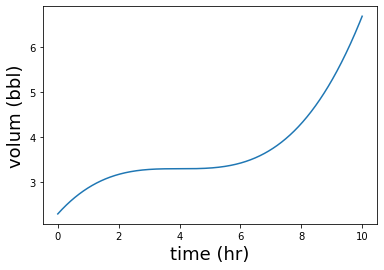

In [4]:
plot_volume(volume,0,10)

### 8.1.1 Implementing an average_flow_rate function

In [5]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2-t1)

In [6]:
volume(4)

3.3

In [7]:
volume(9)

5.253125

In [8]:
average_flow_rate(volume,4,9)

0.390625

### 8.1.2 Picturing the average flow rate with a secant line

### 8.1.3 Negative rates of change

In [9]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

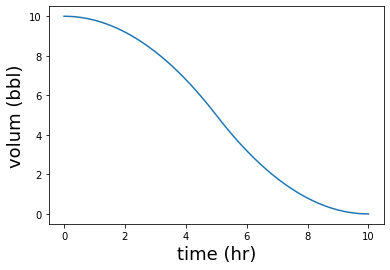

In [10]:
plot_volume(decreasing_volume,0,10)

In [11]:
average_flow_rate(decreasing_volume,0,4)

-0.8

### 8.1.4 Exercises

In [12]:
(77905-77641) / 4.5

58.666666666666664

In [13]:
def secant_line(f,x1,x2):
    def line(x):
        return f(x1) + (x-x1) * (f(x2)-f(x1))/(x2-x1)

In [14]:
def plot_secant(f,x1,x2,color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)